ЛАБОРАТОРНАЯ РАБОТА 4.2


In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import sys

def generate_symmetrical_matrix(l, r, n):
    a = np.random.uniform(l, r, (n, n))
    a = np.tril(a) + np.tril(a, -1).T
    return a

def euclidean_norm(vec):
    res = 0
    for el in vec:
        res += el**2
    return np.sqrt(res)

def mul_on_vector(matrix, vector):
    res = []
    for i in range(len(matrix)):
        el = 0
        for j in range(len(vector)):
            el += matrix[i][j] * vector[j]
        res.append(el)
    return res

def scalar_mul(vec1, vec2):
    if len(vec1) < len(vec2):
        length = len(vec2)
    else:
        length = len(vec1)
    res = 0
    for i in range(0, length):
        res += vec1[i] * vec2[i]
    return res

def print_matrix(a):
    for i in range(len(a)):
        print(a[i])

def identity_matrix(n):
  return np.identity(n)

Метод Крылова

In [7]:
def krylov_algo(matrix):
  p = []
  n = len(matrix)
  D = deepcopy(matrix)
  y = [[1] * n]
  A = []
  for i in range(1, n + 1):
    y.append(np.dot(D, y[i - 1]))
  for i in range(n - 1, -1, -1):
    A.append(y[i])
  A = np.transpose(np.array(A))
  f = y[n]
  res_p = np.linalg.solve(A, f)
  p.append(1)
  for pp in res_p:
    p.append(-pp)
  return y, p

Вычисление кругов (интервалов Гершгорина)

In [3]:
def union_intervals(ints):
  union = []
  for start, end in sorted(ints):
    if union and union[-1][1] >= start - 1:
      union[-1][1] = max(union[-1][1], end)
    else:
      union.append([start, end])
  return union

def find_gershgorin_intervals(matrix):
  A = deepcopy(matrix)
  # центры
  centers = np.diagonal(A)
  n = len(centers)
  # радиусы
  rads = []
  for i in range(n):
    rads.append(np.sum(np.abs(A[i])) - centers[i])
  # print()
  # print(rads)
  intervals = [ (centers[i] - rads[i], centers[i] + rads[i]) for i in range(n)]
  # print(intervals)
  intervals = union_intervals(deepcopy(intervals))
  return intervals

поиск собственных значений и векторов матрицы

In [28]:
def polynomy(a, x):
  # a[0]*x**(N-1) + a[1]*x**(N-2) + ... + a[N-2]*x + a[N-1]
  val = 0
  n = len(a)
  for i in range(n-1, -1, -1):
    val += a[n - 1 - i] * x**i
  return val

def find_eigen_values(eqCoeffs, intervals, len):
  # print(intervals)
  values = []
  len2 = 10e-7
  for interval in intervals:
    left = interval[0]
    right = interval[1]
    # print(left, right)
    l = int(np.floor((right - left) / len))
    # print(l)
    for i in range(l):
      x_left = left + i * len
      x_right = x_left + len
      # print(f'left x: {x_left}')
      # print(f'right x: {x_right}')
      y_left = polynomy(eqCoeffs, x_left)
      y_right = polynomy(eqCoeffs, x_right)
      # print(f'left y: {y_left}')
      # print(f'right y: {y_right}')
      alpha = y_left * y_right
      # print(alpha)
      if (alpha < 0):
        while x_right - x_left >= len2:
          x_middle = (x_right + x_left) / 2
          y_middle = polynomy(eqCoeffs, x_middle)
          beta = y_left * y_middle
          if beta < 0:
            x_right = x_middle
          else:
            x_left = x_middle
        values.append((x_right + x_left) / 2)
      elif y_left == 0:
        values.append(x_left)
      elif y_right == 0:
        values.append(x_right)
  return values


def find_eigen_vectors(y, lambdas, p):
  n = len(p) - 1
  xs = []
  q = []
  for i in range(n):
    x = np.array(y[n - 1])
    q_i = []
    q_i.append(1)
    for j in range(1, n):
      q_i.append(lambdas[i] * q_i[j - 1] + p[j])
      x = x + np.dot(q_i[j], y[n - 1 - j])
    xs.append(x)

  return xs


график

In [19]:
def show_chart(eigenvalues, equatationCoeffs):
    left = eigenvalues[0]
    right = eigenvalues[1]

    for i in range(1, len(eigenvalues)):
        if eigenvalues[i] < left:
            left = eigenvalues[i]
        if eigenvalues[i] > right:
            right = eigenvalues[i]

    interval_len = right - left
    left -= interval_len * 0.1
    right += interval_len * 0.1
    xs = np.linspace(left, right, 1000)
    ys = []
    for x in xs:
      ys.append(polynomy(equatationCoeffs, x))

    plt.plot(xs, ys, color='blue')
    plt.yscale("symlog")
    plt.grid()
    plt.show()

matrix:
[2.2 1.  0.5 2. ]
[1.  1.3 2.  1. ]
[0.5 2.  0.5 1.6]
[2.  1.  1.6 2. ]

U intervals: [[-3.5999999999999996, 6.6]]

p:
 [1, -5.999999999999854, -0.20000000000073817, 12.73499999999927, -2.7615999999984377]

Y:
[1, 1, 1, 1]
[5.7 5.3 4.6 6.6]
[33.34 28.39 26.31 37.26]
[189.413 160.127 146.221 211.686]
[1073.3181  901.7061  826.7686 1196.2786]


lambdas: [-1.4200863647460937, 0.22263580322265686, 1.5454183959960939, 5.652032165527345]

Vieta`s theorem works

Gershgorin`s theorem works


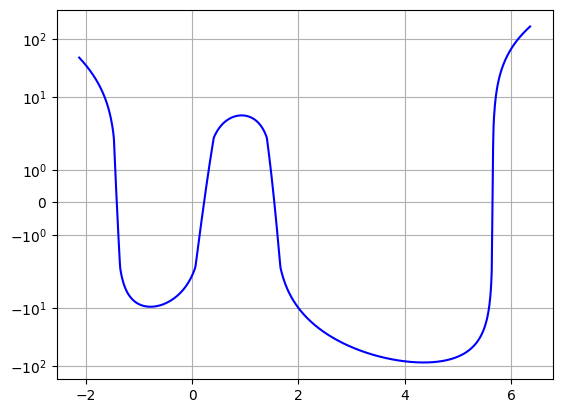


eigin vectors:
 x_1: [-0.99551251  2.31304961 -3.39518518  1.49419607]
 x_2: [ 0.72817136  0.63462338 -0.21408541 -0.9837196 ]
 x_3: [ 2.3043117  -2.09783242 -1.77936803  0.73957869]
 x_4: [165.95001604 139.25314698 127.58762785 184.90892928]

eigin orthonormal vectors:
 x_1: [-0.22204259  0.51591068 -0.75727398  0.33327072]
 x_2: [ 0.52192064  0.45486964 -0.15344684 -0.70508618]
 x_3: [ 0.62892982 -0.57257417 -0.48565375  0.20185771]
 x_4: [0.53173607 0.44619412 0.40881553 0.59248411]

Eigen vectors are orthogonal


In [34]:
n = 4
a = np.array([[2.2, 1, 0.5, 2],
             [1, 1.3, 2, 1],
             [0.5, 2, 0.5, 1.6],
             [2, 1, 1.6, 2]])
print('matrix:')
print_matrix(a)
intervals = find_gershgorin_intervals(a)
print(f'\nU intervals: {intervals}')

Ys, P = krylov_algo(a)
print(f'\np:\n {P}')
print()
print(f'Y:')
for y in Ys:
  print(y)
print()
# собтвенные значения
vals = find_eigen_values(P, intervals, 10e-3)
print(f'\nlambdas: {vals}')

# проверка вычисленных сосбвтенных значений по теореме Виета
sum_eigens = np.sum(vals)
sp = [sum(a[i][i] for i in range(0, len(a)))]
# print(sum_eigens)
# print(sp)
if (np.abs(sum_eigens - sp) > 0.1):
  print("\nVieta`s theorem doesn`t work")
else:
  print("\nVieta`s theorem works")

# проверка условий теоремы Гершгорина
ok = 0
for interval in intervals:
  for i in vals:
    if i > interval[1] or i < interval[0]:
      print("\nGershgorin`s theorem error")
      ok = 0
      sys.exit()
    else:
      ok = 1
if ok == 1:
  print("\nGershgorin`s theorem works")

#  строим график
show_chart(vals, P)

# собтвенные вектора
vecs = find_eigen_vectors(Ys, vals, P)
print('\neigin vectors:')
for i in range(len(vecs)):
  print(f' x_{i+1}: {vecs[i]}')

# ортонормированные собственные вектора
print('\neigin orthonormal vectors:')
for i in range(len(vecs)):
  print(f' x_{i+1}: {vecs[i]/euclidean_norm(vecs[i])}')

# проверка условия ортогональности собственных векторов
ort = 0
for i in range (n - 1):
  for j in range (i + 1, n):
    scal = scalar_mul(vecs[i], vecs[j])
    if np.abs(scal) > 0.1:
      print("\nEigen vectors are not orthogonal")
      print(np.abs(scal))
      ort = 0
      sys.exit()
    else:
      ort = 1

if ort == 1:
  print("\nEigen vectors are orthogonal")

тест 2

matrix:
[ 2.78172363 -1.79215509  2.73786322 -5.08477146  6.61567341  6.2060726
  7.77257642 -9.21457787 -1.32519043 -1.7848726 ]
[-1.79215509  8.42421339 -0.9931645   9.32714482 -7.74673852 -0.9554525
 -3.11457506  4.90276058 -8.29639364 -3.83600108]
[ 2.73786322 -0.9931645  -4.12182706 -8.03590716  5.04808783 -3.21436656
 -3.95629636 -8.5497756  -9.50530277 -3.20515006]
[-5.08477146  9.32714482 -8.03590716  9.00110467  8.58267721  5.03492087
  9.69173809 -9.61628419 -8.40654511  5.0795306 ]
[ 6.61567341 -7.74673852  5.04808783  8.58267721 -4.64799827 -8.46827178
 -7.26934098  1.2371924  -7.74729033  7.99842266]
[ 6.2060726  -0.9554525  -3.21436656  5.03492087 -8.46827178  5.32471696
  9.8391456  -7.59446689 -9.09273192 -5.96700737]
[ 7.77257642 -3.11457506 -3.95629636  9.69173809 -7.26934098  9.8391456
  5.27610184  5.59334303 -5.55190577  3.07157594]
[-9.21457787  4.90276058 -8.5497756  -9.61628419  1.2371924  -7.59446689
  5.59334303 -5.87050562 -0.14354138  9.0020128 ]
[-1.3251904

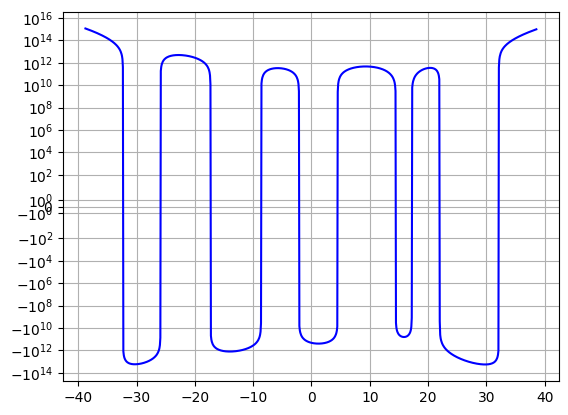


eigin vectors:
 x_1: [-1.75035115e+12  1.48736331e+12 -1.28468439e+12 -2.38559825e+12
  2.42562320e+12  2.10676279e+11  1.80013845e+12 -2.76231048e+12
  3.36638071e+11  4.78333857e+11]
 x_2: [-5.47801211e+11  1.40721351e+12  3.42502718e+12  9.63300934e+11
  2.67216752e+12  2.79633018e+12  6.84168937e+11  2.23463298e+12
  5.02986923e+12 -3.69246872e+11]
 x_3: [-2.66042551e+10 -6.44068078e+10 -1.24201744e+11  1.23486642e+10
  2.00736127e+11 -5.47391241e+10  5.68584658e+10  1.57348957e+11
 -8.64263348e+10 -4.07375924e+11]
 x_4: [ 6.07028077e+09  2.16426016e+09 -1.81288557e+10 -7.36006237e+09
  1.08344004e+10  2.33845416e+10 -2.19884144e+10  9.88940506e+09
 -5.70886939e+09  8.72393719e+09]
 x_5: [-6.23432232e+10 -3.18482697e+10  3.29379630e+10 -9.42637195e+09
 -5.00398168e+09  3.01057017e+10  6.27847209e+08  9.68991963e+09
 -3.66870637e+10  3.88135820e+09]
 x_6: [ 4.00014746e+10  4.59611641e+10  3.85117378e+10 -5.80547181e+10
  6.60547822e+09 -1.33366414e+10  4.18430546e+10  6.12716275e+1

In [38]:
n = 10
a = generate_symmetrical_matrix(-10, 10, n)
print('matrix:')
print_matrix(a)
intervals = find_gershgorin_intervals(a)
print(f'\nU intervals: {intervals}')

Ys, P = krylov_algo(a)
print(f'\np:\n {P}')
print()
print(f'Y:\n {Ys}')
print()
# собтвенные значения
vals = find_eigen_values(P, intervals, 10e-3)
print(f'\nlambdas: {vals}')

# проверка вычисленных сосбвтенных значений по теореме Виета
sum_eigens = np.sum(vals)
sp = [sum(a[i][i] for i in range(0, len(a)))]
# print(sum_eigens)
# print(sp)
if (np.abs(sum_eigens - sp) > 0.1):
  print("\nVieta`s theorem doesn`t work")
else:
  print("\nVieta`s theorem works")

# проверка условий теоремы Гершгорина
ok = 0
for interval in intervals:
  for i in vals:
    if i > interval[1] or i < interval[0]:
      print("\nGershgorin`s theorem error")
      ok = 0
      sys.exit()
    else:
      ok = 1
if ok == 1:
  print("\nGershgorin`s theorem works")

#  строим график
show_chart(vals, P)

# собтвенные вектора
vecs = find_eigen_vectors(Ys, vals, P)
print('\neigin vectors:')
for i in range(len(vecs)):
  print(f' x_{i+1}: {vecs[i]}')

# ортонормированные собственные вектора
print('\neigin orthonormal vectors:')
for i in range(len(vecs)):
  print(f' x_{i+1}: {vecs[i]/euclidean_norm(vecs[i])}')

# проверка условия ортогональности собственных векторов
ort = 0
for i in range (n - 1):
  for j in range (i + 1, n):
    scal = scalar_mul(vecs[i], vecs[j])
    if np.abs(scal) > 0.1:
      print("\nEigen vectors are not orthogonal")
      # print(np.abs(scal))
      ort = 0
    else:
      ort = 1

if ort == 1:
  print("\nEigen vectors are orthogonal")